<a href="https://colab.research.google.com/github/Abbastouqi/Data-Analysis/blob/main/Copy_of_emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/train.txt",sep=";",names=["Description","Emotion"])
df.head()

,Description,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df['Emotion'].value_counts()

Emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("/content/train.txt", sep=";", names=["Description", "Emotion"])

# Clean the "Emotion" column
df["Emotion"] = df["Emotion"].str.strip().str.lower()

# Create a dictionary to map emotions to numeric values
emotion_mapping = {
    'joy': 0,
    'sadness': 1,
    'anger': 2,
    'fear': 3,
    'love': 4,
    'surprise': 5
}

# Map the "Emotion" column to numeric values using the dictionary
df['Emotion_num'] = df['Emotion'].map(emotion_mapping)

# Display the first few rows of the DataFrame to verify the mapping
print(df.head())


                                         Description  Emotion  Emotion_num
0                            i didnt feel humiliated  sadness            1
1  i can go from feeling so hopeless to so damned...  sadness            1
2   im grabbing a minute to post i feel greedy wrong    anger            2
3  i am ever feeling nostalgic about the fireplac...     love            4
4                               i am feeling grouchy    anger            2


<ipython-input-14-f4648259d21e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Emotion', data=df, order=df['Emotion'].value_counts().index, palette="husl")


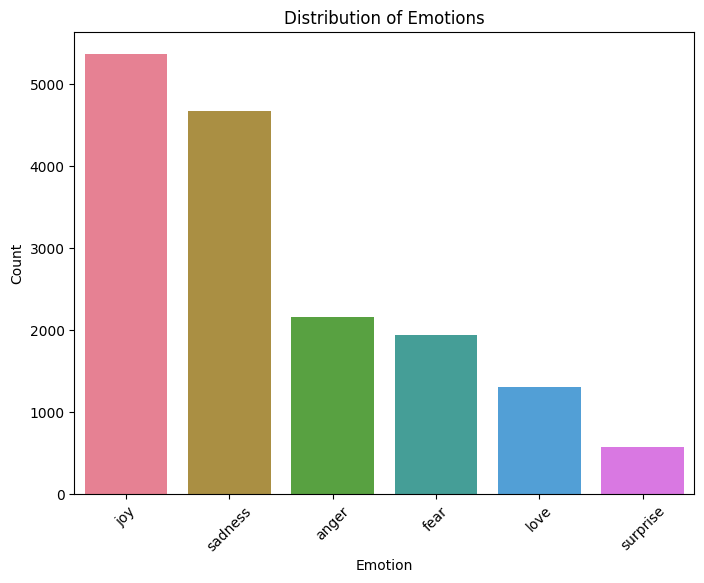

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined and contains the data

# Bar plot for emotion distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Emotion', data=df, order=df['Emotion'].value_counts().index, palette="husl")
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()


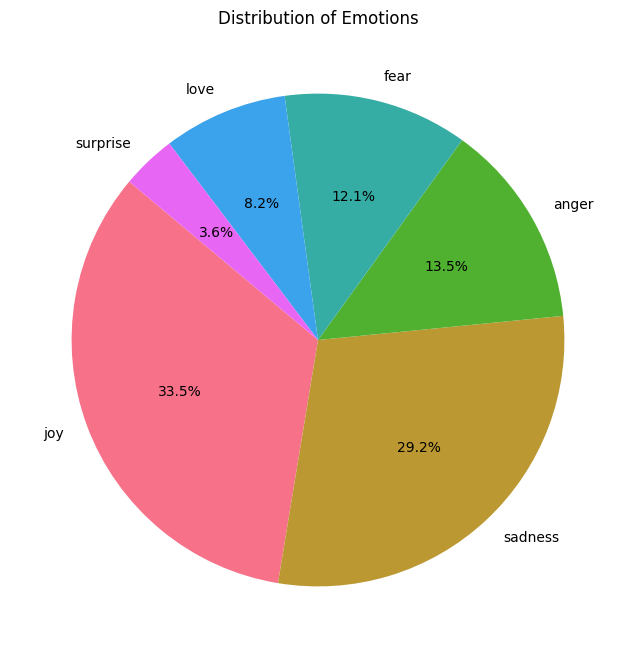

In [ ]:
# Calculate the count of each emotion
emotion_counts = df["Emotion"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("husl", len(emotion_counts)))
plt.title('Distribution of Emotions')
plt.show()

<ipython-input-17-d842a0b65f86>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Emotion', data=df, kde=True, palette='Set2', element='bars', stat='count', common_norm=False)


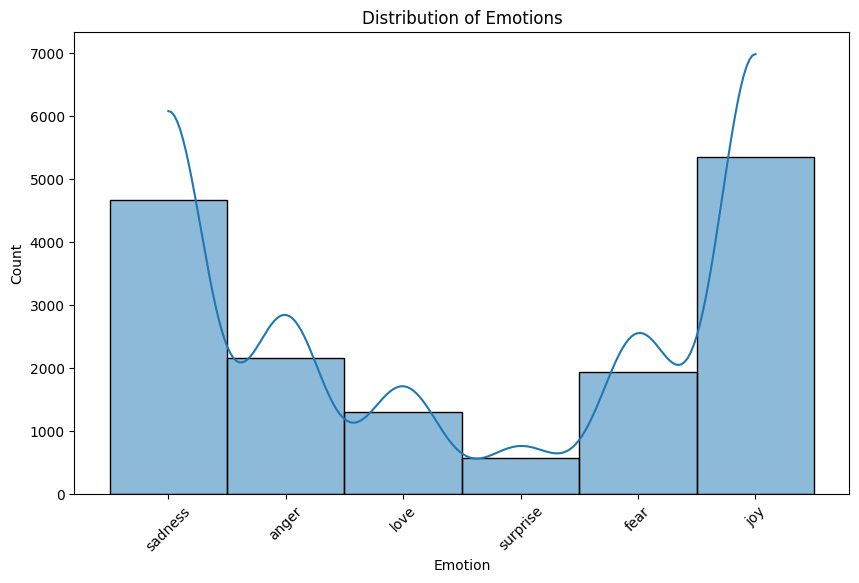

In [ ]:
# Histogram plot for emotion distribution with KDE
plt.figure(figsize=(10, 6))
sns.histplot(x='Emotion', data=df, kde=True, palette='Set2', element='bars', stat='count', common_norm=False)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability
plt.show()

In [ ]:
import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to preprocess text using spaCy
def preprocess(text):
    doc = nlp(text)  # Process the input text using the loaded spaCy model
    filtered_tokens = []  # Initialize an empty list to store filtered tokens

    # Iterate through each token in the processed doc
    for token in doc:
        if token.is_stop or token.is_punct:  # Check if the token is a stop word or punctuation
            continue  # Skip the token if it is a stop word or punctuation
        else:
            filtered_tokens.append(token.lemma_)  # Append the lemma (base form) of the token to filtered_tokens

    return " ".join(filtered_tokens)  # Join the filtered tokens into a single string and return it


In [ ]:
df['processed_text'] = df["Description"].apply(preprocess)
df

,Description,Emotion,Emotion_num,processed_text
0,i didnt feel humiliated,sadness,1,not feel humiliate
1,i can go from feeling so hopeless to so damned...,sadness,1,feel hopeless damned hopeful care awake
2,im grabbing a minute to post i feel greedy wrong,anger,2,m grab minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,4,feel nostalgic fireplace know property
4,i am feeling grouchy,anger,2,feel grouchy
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,1,brief time beanbag say anna feel like beat
15996,i am now turning and i feel pathetic that i am...,sadness,1,turn feel pathetic wait table sub teaching degree
15997,i feel strong and good overall,joy,0,feel strong good overall
15998,i feel like this was such a rude comment and i...,anger,2,feel like rude comment m glad t


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Description'], df['Emotion_num'], test_size=0.2, random_state=42)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

# Define a Pipeline for KNN
knn = Pipeline([
    ('tfidf', TfidfVectorizer()),   # Step 1: Convert text to TF-IDF vectors
    ('classifier', KNeighborsClassifier())  # Step 2: K-Nearest Neighbors classifier
])

# Train the Pipeline on training data
knn.fit(X_train, y_train)

# Predict using the trained Pipeline on test data
knn_y_pred = knn.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report

# Assuming you already have `knn` and `knn_y_pred` defined from previous steps

# Print the Classification Report
print("Classification Report:\n", classification_report(y_test, knn_y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.87      0.75      1021
           1       0.73      0.82      0.77       946
           2       0.76      0.61      0.68       427
           3       0.77      0.52      0.62       397
           4       0.77      0.35      0.48       296
           5       0.64      0.30      0.41       113

    accuracy                           0.71      3200
   macro avg       0.72      0.58      0.62      3200
weighted avg       0.72      0.71      0.69      3200



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Logistic Regression
lr = Pipeline([
('tfidf', TfidfVectorizer()),
('classifier', LogisticRegression())
])
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, lr_y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.96      0.87      1021
           1       0.87      0.94      0.90       946
           2       0.90      0.77      0.83       427
           3       0.85      0.70      0.77       397
           4       0.89      0.55      0.68       296
           5       0.88      0.43      0.58       113

    accuracy                           0.84      3200
   macro avg       0.86      0.73      0.77      3200
weighted avg       0.85      0.84      0.83      3200



In [ ]:
# Multinomial Naive Bayes
nb = Pipeline([
('tfidf', TfidfVectorizer()),
('classifier', MultinomialNB())
])
nb.fit(X_train, y_train)
nb_y_pred = nb.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, nb_y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.99      0.71      1021
           1       0.69      0.90      0.78       946
           2       0.91      0.17      0.29       427
           3       0.93      0.11      0.19       397
           4       1.00      0.01      0.01       296
           5       0.00      0.00      0.00       113

    accuracy                           0.62      3200
   macro avg       0.68      0.36      0.33      3200
weighted avg       0.71      0.62      0.52      3200

